In [87]:
# %run -i 'load_data.py'
import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
from scipy.stats import chisquare
from scipy.stats import combine_pvalues
%run -i 'test_functions.py'

In [88]:
chen_data_out = test_anova_filters(chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                chen_read_counts, chen_coverage_tab, chen_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
                      mrna_min = 10, read_min =10, dset_name = 'chen dataset;', correct_multitest = False)

intermediate exons: 1117


HBox(children=(IntProgress(value=0, max=1117), HTML(value='')))

not pass: 84
tested exons: 1033


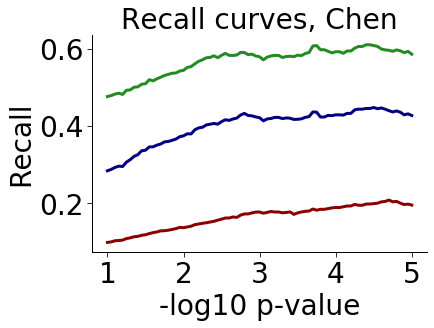

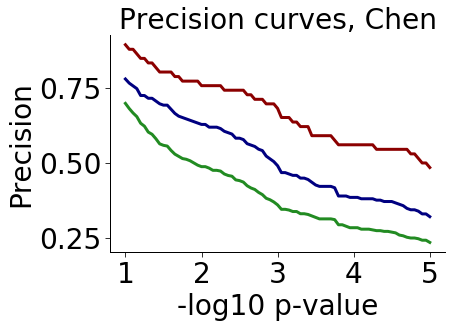

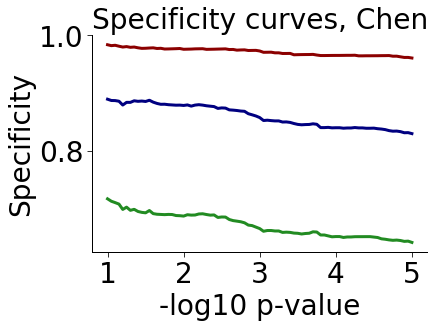

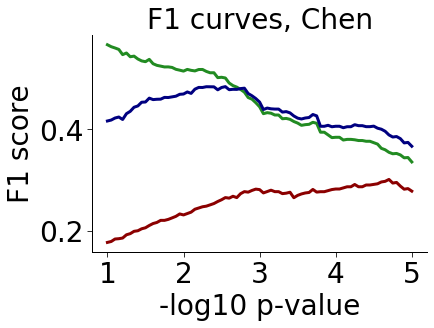

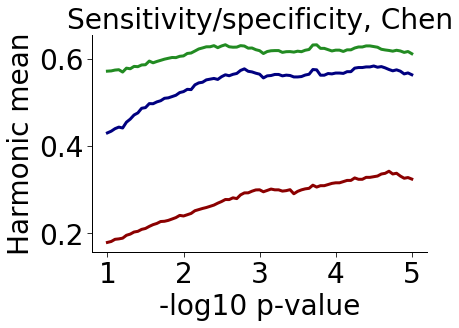

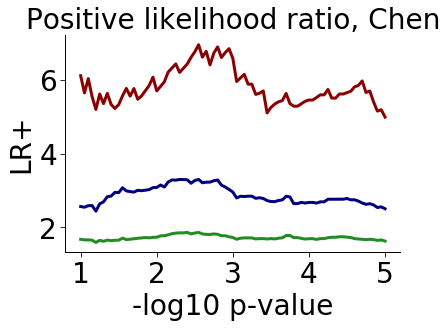

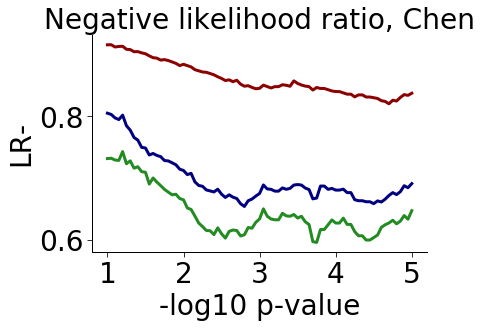

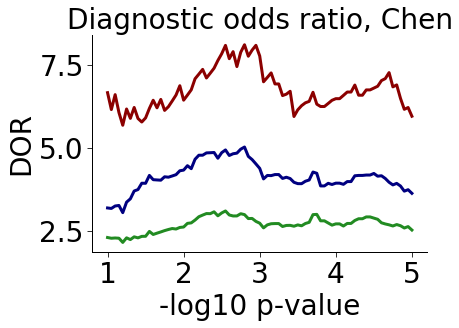

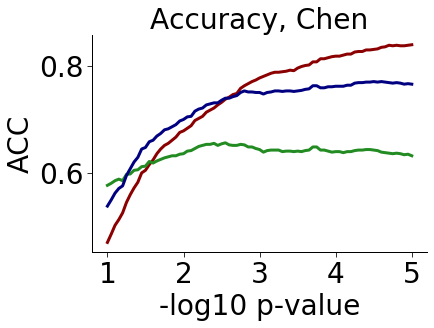

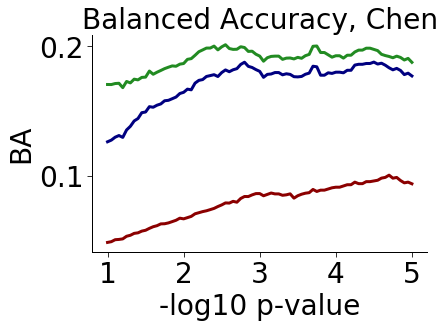

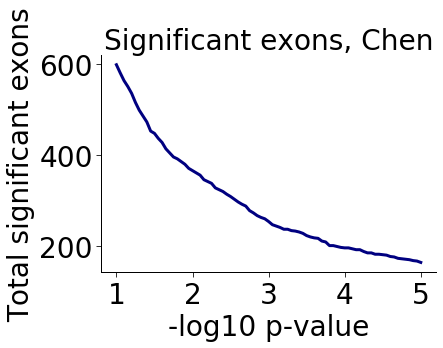

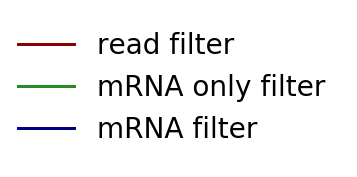

In [89]:
# figsize(6,4)
summary_plots(chen_data_out, dset_name='Chen', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [35]:
# song_data_out = test_anova_filters(song_PSI, song_mrna_counts, mrna_per_event_song, 
#                 song_read_counts, song_coverage_tab, song_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
#                       mrna_min = 10, read_min =10, dset_name = 'song dataset;', correct_multitest = False)

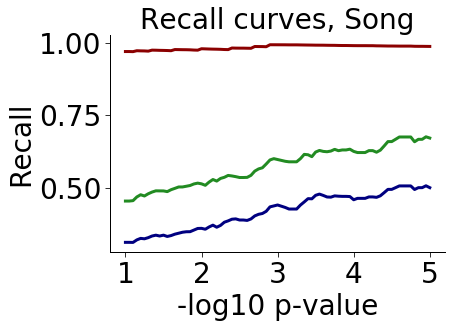

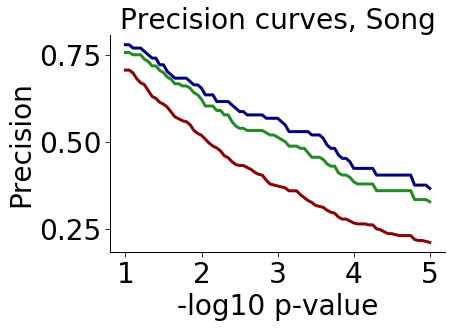

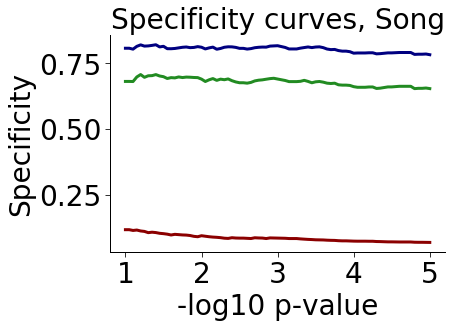

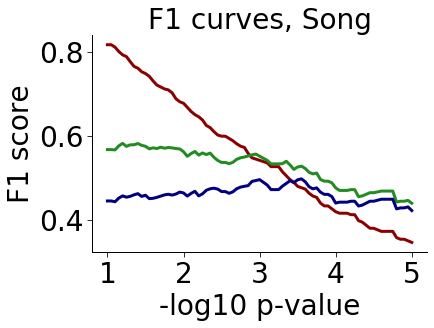

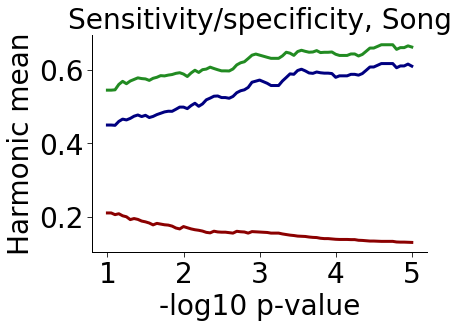

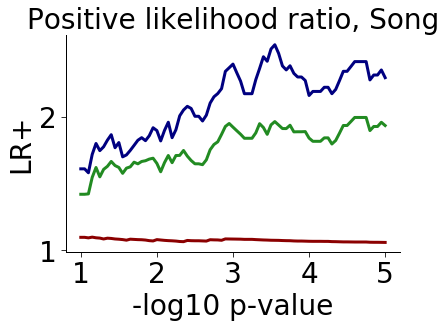

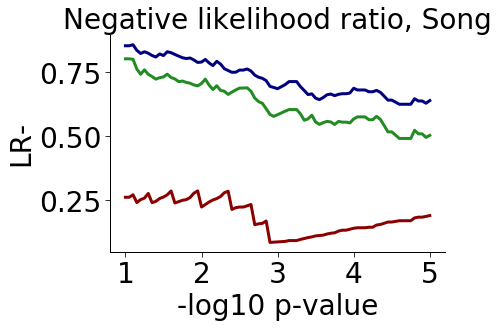

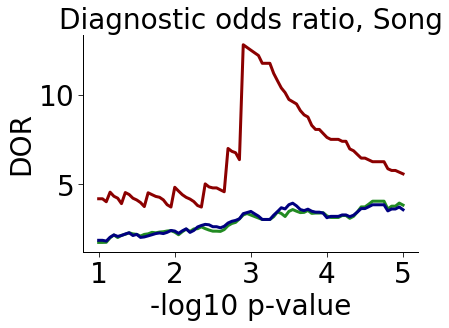

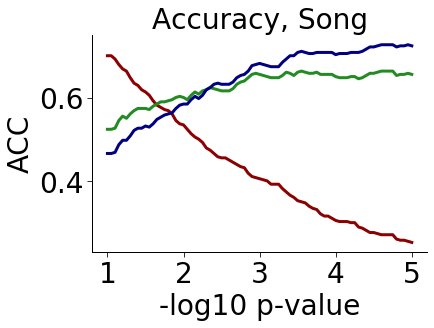

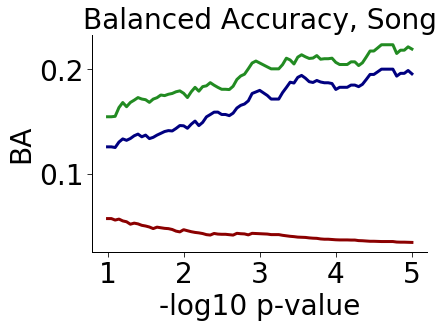

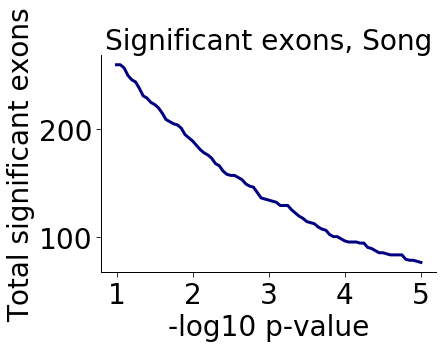

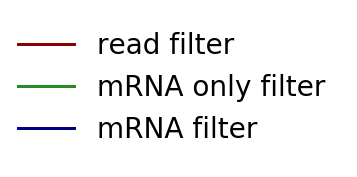

In [36]:
# figsize(6,4)
summary_plots(song_data_out, dset_name='Song', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [37]:
# lescroart_data_out = test_anova_filters(lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
#                 lescroart_read_counts, lescroart_coverage_tab, lescroart_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
#                       mrna_min = 10, read_min =10, dset_name = 'lescroart dataset;', correct_multitest = False)

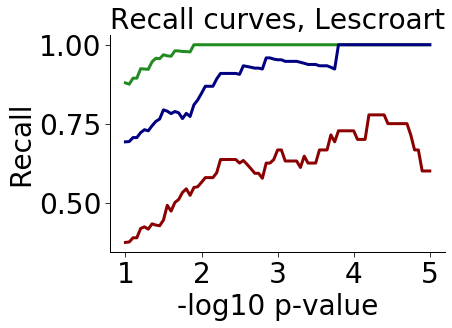

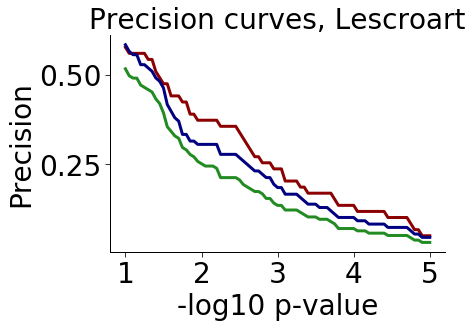

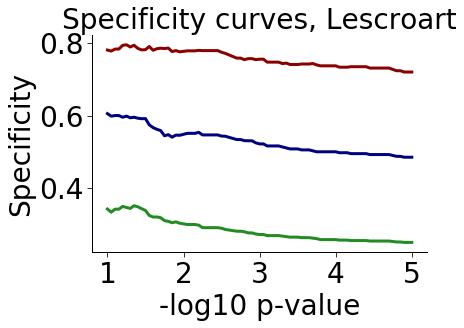

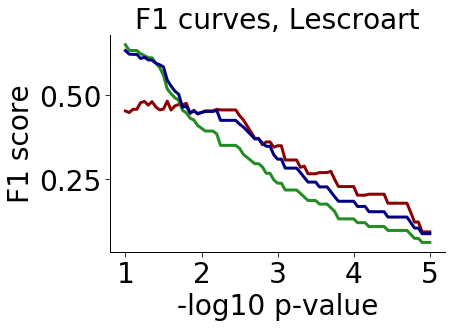

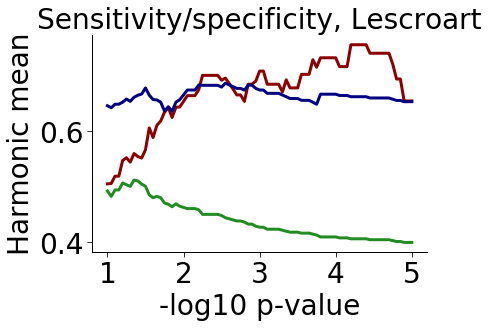

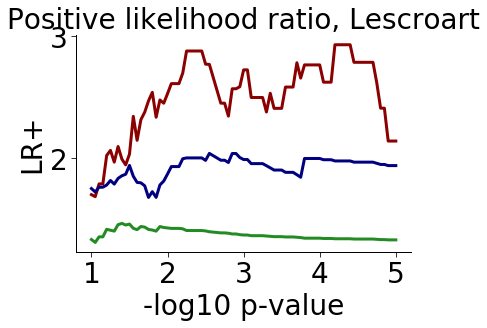

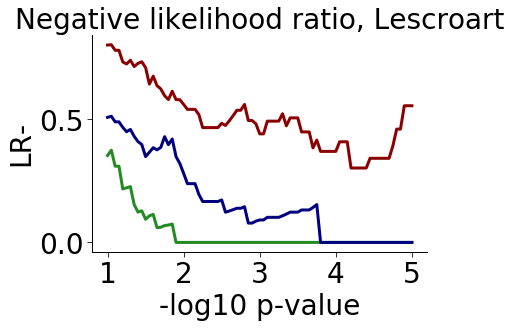

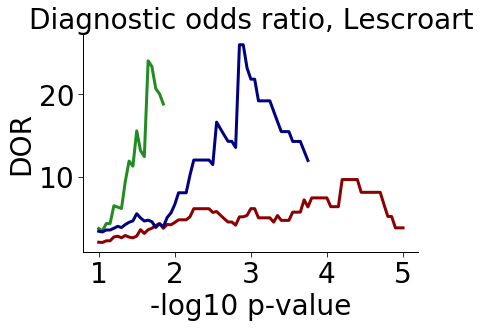

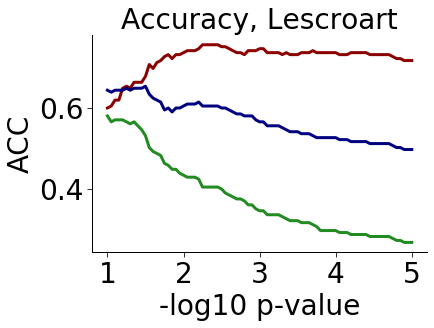

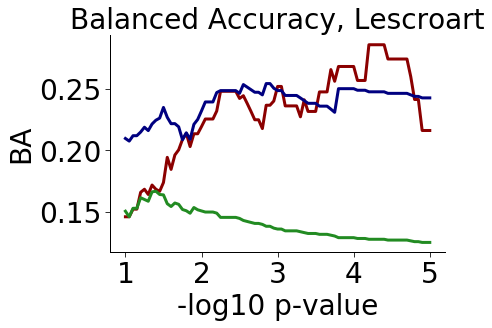

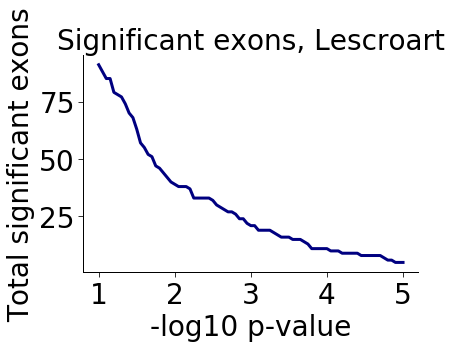

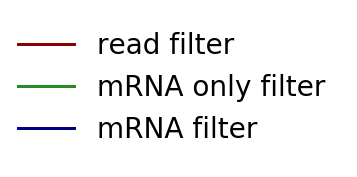

In [38]:
# figsize(6,4)
summary_plots(lescroart_data_out, dset_name='Lescroart', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [39]:
# trapnell_data_out = test_anova_filters(trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
#                 trapnell_read_counts, trapnell_coverage_tab, trapnell_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
#                       mrna_min = 10, read_min =10, dset_name = 'trapnell dataset;', correct_multitest = False)

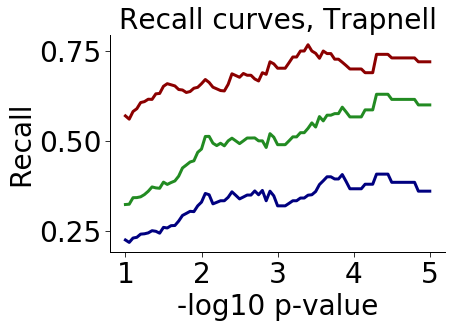

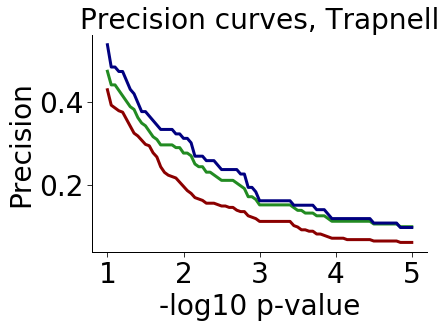

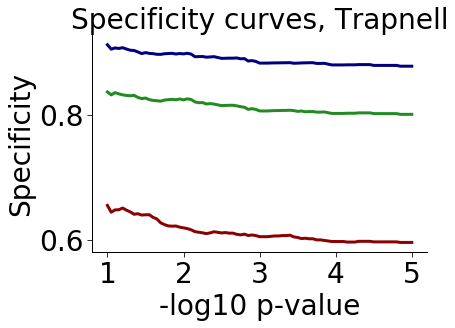

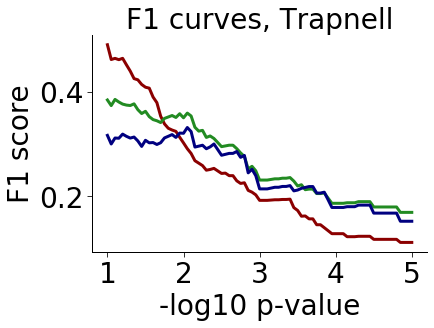

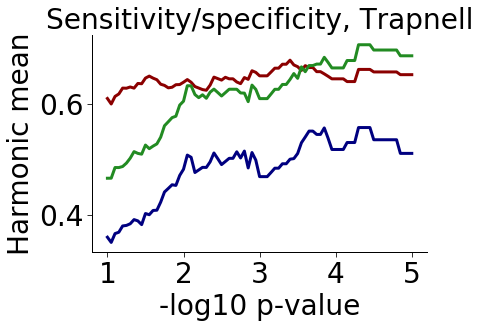

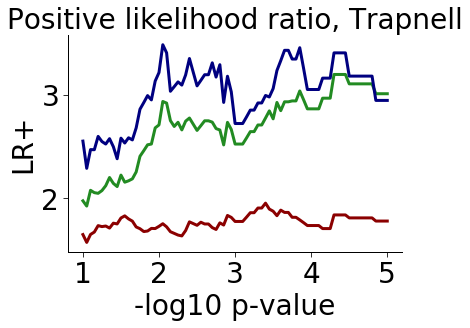

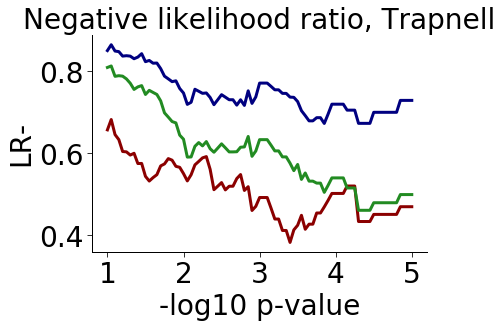

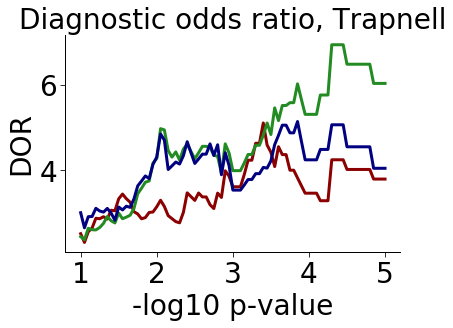

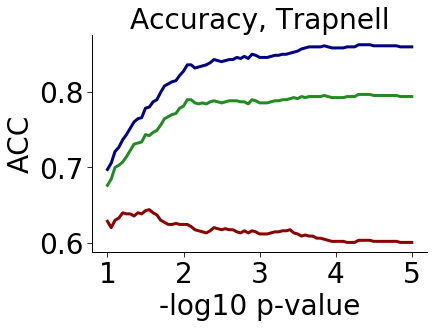

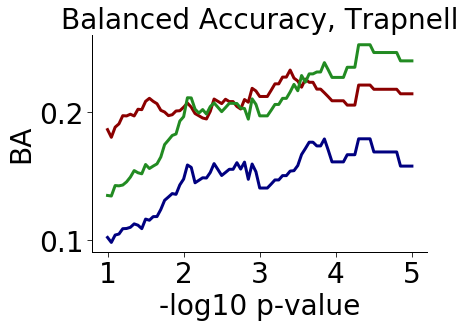

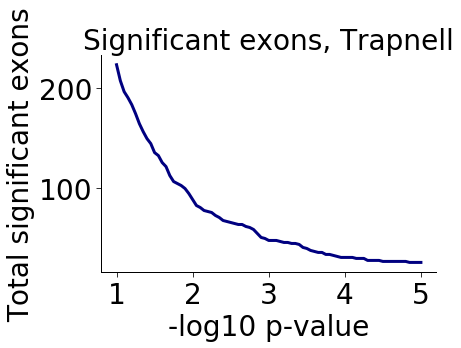

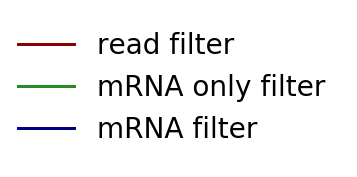

In [40]:
# figsize(6,4)
summary_plots(trapnell_data_out, dset_name='Trapnell', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [29]:
# %run -i 'test_filter_finctions.py'

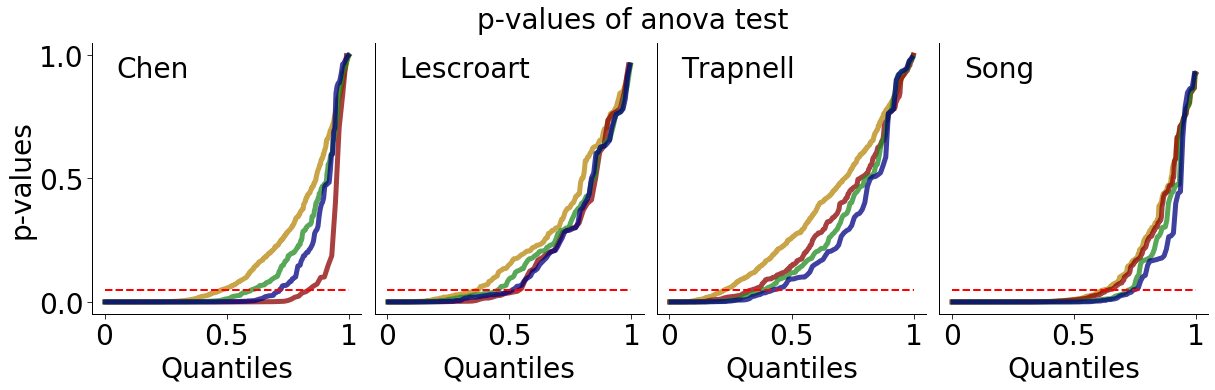

In [95]:
def plot_pvalues(ax, test_data):
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    current_palette = sns.color_palette('dark')
    
    pplot_1 = probplot(pvals.pvals, dist='uniform')[0]
    pplot_2 = probplot(pvals.loc[selected_read, 'pvals'], dist='uniform')[0]
    pplot_3 = probplot(pvals.loc[selected_mrna_only, 'pvals'], dist='uniform')[0]
    pplot_4 = probplot(pvals.loc[selected_mrna, 'pvals'], dist='uniform')[0]
    
    ax.plot(pplot_1[0], pplot_1[1], alpha = 0.75, c=current_palette[4], label='all exons', linewidth=5)
    ax.plot(pplot_2[0], pplot_2[1], alpha = 0.75, c='darkred', label='read filter', linewidth=5)
    ax.plot(pplot_3[0], pplot_3[1], alpha = 0.75, c='forestgreen', label='mRNA only filter', linewidth=5)
    ax.plot(pplot_4[0], pplot_4[1], alpha = 0.75, c='navy', label='combined filter', linewidth=5)
    ax.plot([0, 1], [0.05, 0.05], 'r--', linewidth=2)
    ax.set_xlabel('Quantiles', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(['0', '0.5', '1'])
    
    ax.tick_params(labelsize=28, length=5)
    
    
    
    
    
    
figsize(20, 5)
fig = plt.figure()

fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,1.05))
ax_2.set_ylim((-0.05,1.05))
ax_3.set_ylim((-0.05,1.05))
ax_4.set_ylim((-0.05,1.05))

plot_pvalues(ax_1, chen_data_out)
plot_pvalues(ax_2, lescroart_data_out)
plot_pvalues(ax_3, trapnell_data_out)
plot_pvalues(ax_4, song_data_out)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('p-values', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/pvalues.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




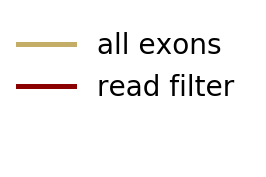

In [96]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

# ax.plot([], 'r--', linewidth=2, label='pval = 0.05')
ax.plot([], c=current_palette[4], label='all exons', linewidth=5)
ax.plot([], c='darkred', label='read filter', linewidth=5)
# ax.plot([], c='forestgreen', label='mRNA only filter', linewidth=5)
# ax.plot([], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_labels_1.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_1.png', bbox_inches='tight', transparent=True)
plt.show()

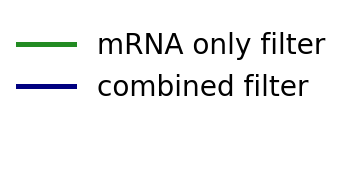

In [97]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

# ax.plot([], 'r--', linewidth=2, label='pval = 0.05')
# ax.plot([], c=current_palette[4], label='all exons', linewidth=5)
# ax.plot([], c='darkred', label='read filter', linewidth=5)
ax.plot([], c='forestgreen', label='mRNA only filter', linewidth=5)
ax.plot([], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_labels_2.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_2.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_2.png', bbox_inches='tight', transparent=True)
plt.show()

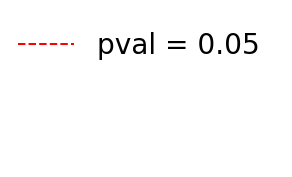

In [98]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.plot([], 'r--', linewidth=2, label='pval = 0.05')
# ax.plot([], c=current_palette[4], label='all exons', linewidth=5)
# ax.plot([], c='darkred', label='read filter', linewidth=5)
# ax.plot([], c='forestgreen', label='mRNA only filter', linewidth=5)
# ax.plot([], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_labels_3.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_3.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_3.png', bbox_inches='tight', transparent=True)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

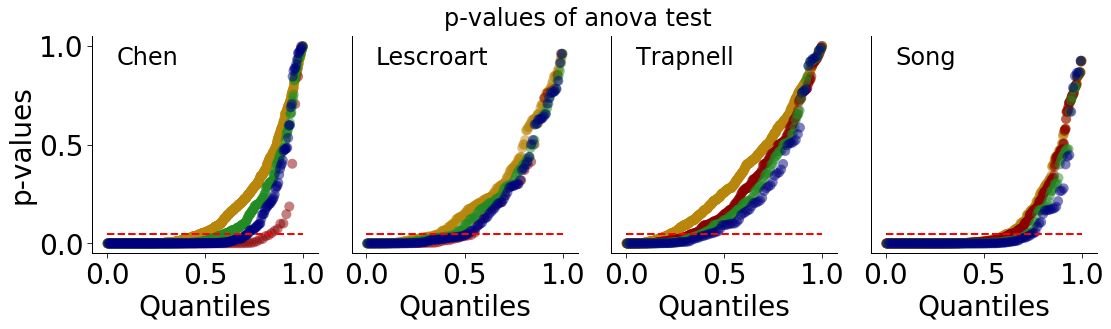

In [59]:
def plot_pvalues(ax, test_data):
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    current_palette = sns.color_palette('dark')
    
    pplot_1 = probplot(pvals.pvals, dist='uniform')[0]
    pplot_2 = probplot(pvals.loc[selected_read, 'pvals'], dist='uniform')[0]
    pplot_3 = probplot(pvals.loc[selected_mrna_only, 'pvals'], dist='uniform')[0]
    pplot_4 = probplot(pvals.loc[selected_mrna, 'pvals'], dist='uniform')[0]
    
    ax.scatter(pplot_1[0], pplot_1[1], alpha = 0.5, c=current_palette[4], label='all exons', edgecolors='none', s=100)
    ax.scatter(pplot_2[0], pplot_2[1], alpha = 0.5, c='darkred', label='read filter', edgecolors='none', s=100)
    ax.scatter(pplot_3[0], pplot_3[1], alpha = 0.5, c='forestgreen', label='mRNA only filter', edgecolors='none', s=100)
    ax.scatter(pplot_4[0], pplot_4[1], alpha = 0.5, c='navy', label='combined filter', edgecolors='none', s=100)
    ax.plot([0, 1], [0.05, 0.05], 'r--', linewidth=2)
    ax.set_xlabel('Quantiles', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)
    
    
    
    
    
    
figsize(18, 4)
fig = plt.figure()

fig.suptitle('p-values of anova test', fontsize=24)

gs = GridSpec(1,4)
gs.update(wspace=0.15, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,1.05))
ax_2.set_ylim((-0.05,1.05))
ax_3.set_ylim((-0.05,1.05))
ax_4.set_ylim((-0.05,1.05))

plot_pvalues(ax_1, chen_data_out)
plot_pvalues(ax_2, lescroart_data_out)
plot_pvalues(ax_3, trapnell_data_out)
plot_pvalues(ax_4, song_data_out)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(0.05, 1, 'Chen', fontsize=24, verticalalignment='top')
ax_2.text(0.05, 1, 'Lescroart', fontsize=24, verticalalignment='top')
ax_3.text(0.05, 1, 'Trapnell', fontsize=24, verticalalignment='top')
ax_4.text(0.05, 1, 'Song', fontsize=24, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('p-values', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/pvalues_scatter.svg', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter.png', dpi=300, bbox_inches='tight')

plt.show()




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


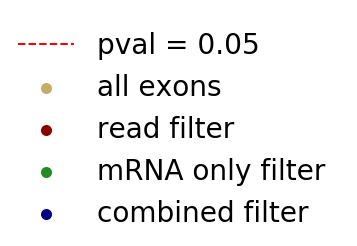

In [58]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.plot([], 'r--', linewidth=2, label='pval = 0.05')
ax.scatter([], [], c=current_palette[4], label='all exons', linewidth=5)
ax.scatter([], [], c='darkred', label='read filter', linewidth=5)
ax.scatter([], [], c='forestgreen', label='mRNA only filter', linewidth=5)
ax.scatter([], [], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_scatter_labels.svg', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter_labels.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter_labels.png', bbox_inches='tight')
plt.show()

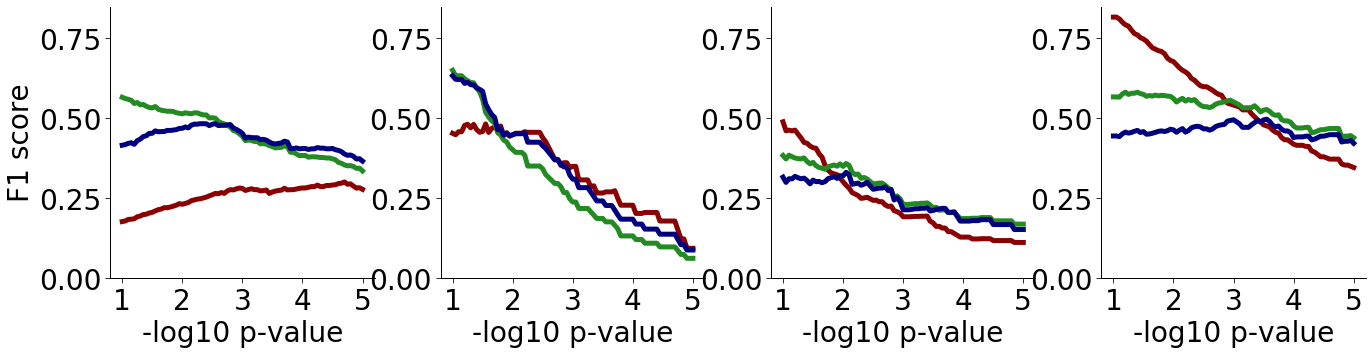

In [93]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=5)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=5)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=5)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.25, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((0,0.85))
ax_2.set_ylim((0,0.85))
ax_3.set_ylim((0,0.85))
ax_4.set_ylim((0,0.85))

plot_curves(ax_1, chen_data_out, 3)
plot_curves(ax_2, lescroart_data_out, 3)
plot_curves(ax_3, trapnell_data_out, 3)
plot_curves(ax_4, song_data_out, 3)

# plt.setp(ax_2.get_yticklabels(), visible=False)
# plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
# ax_2.yaxis.set_ticks_position('none')
# ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')


# ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('F1 score', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

# plt.savefig('plots_review/figure3/anova/pvalues.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/pvalues.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/pvalues.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




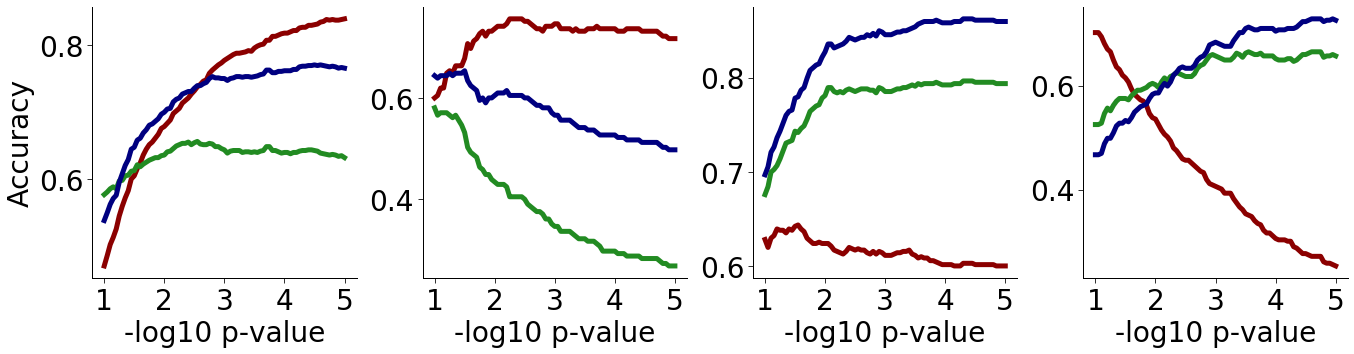

In [91]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=5)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=5)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=5)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.25, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

# ax_1.set_ylim((-0.05,1.05))
# ax_2.set_ylim((-0.05,1.05))
# ax_3.set_ylim((-0.05,1.05))
# ax_4.set_ylim((-0.05,1.05))

plot_curves(ax_1, chen_data_out, 8)
plot_curves(ax_2, lescroart_data_out, 8)
plot_curves(ax_3, trapnell_data_out, 8)
plot_curves(ax_4, song_data_out, 8)

# plt.setp(ax_2.get_yticklabels(), visible=False)
# plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
# ax_2.yaxis.set_ticks_position('none')
# ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')


# ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('Accuracy', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

# plt.savefig('plots_review/figure3/anova/pvalues.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/pvalues.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/pvalues.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




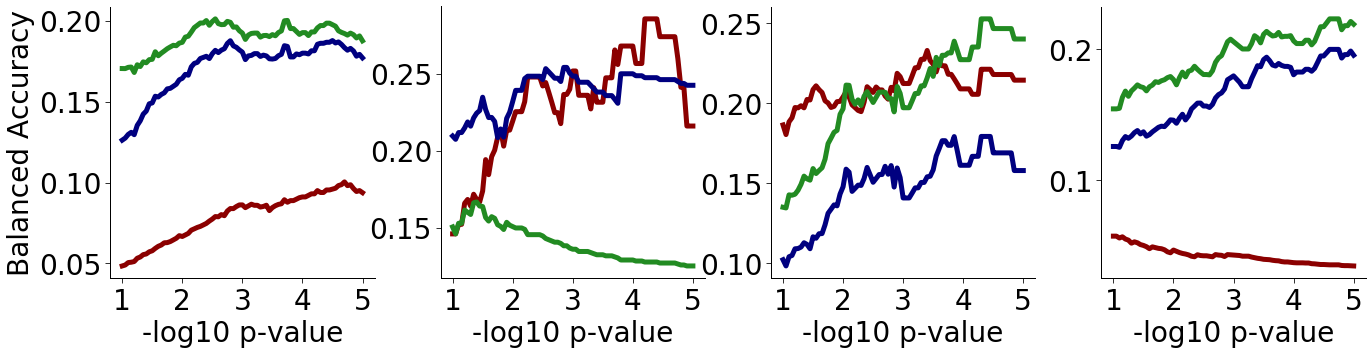

In [92]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=5)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=5)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=5)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.25, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

# ax_1.set_ylim((-0.05,1.05))
# ax_2.set_ylim((-0.05,1.05))
# ax_3.set_ylim((-0.05,1.05))
# ax_4.set_ylim((-0.05,1.05))

plot_curves(ax_1, chen_data_out, 9)
plot_curves(ax_2, lescroart_data_out, 9)
plot_curves(ax_3, trapnell_data_out, 9)
plot_curves(ax_4, song_data_out, 9)

# plt.setp(ax_2.get_yticklabels(), visible=False)
# plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
# ax_2.yaxis.set_ticks_position('none')
# ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')


# ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('Balanced Accuracy', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

# plt.savefig('plots_review/figure3/anova/pvalues.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/pvalues.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/pvalues.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




In [ ]:
# recall_list, precision_list, specificity_list, f1_score_list, hrs_list, LRplus_list, LRminus_list, DOR_list, ACC_list, BA_list